In [1]:
import pandas as pd
df = pd.read_csv("mogi_tphcm_houses_cleaned_filtered_v2.csv")

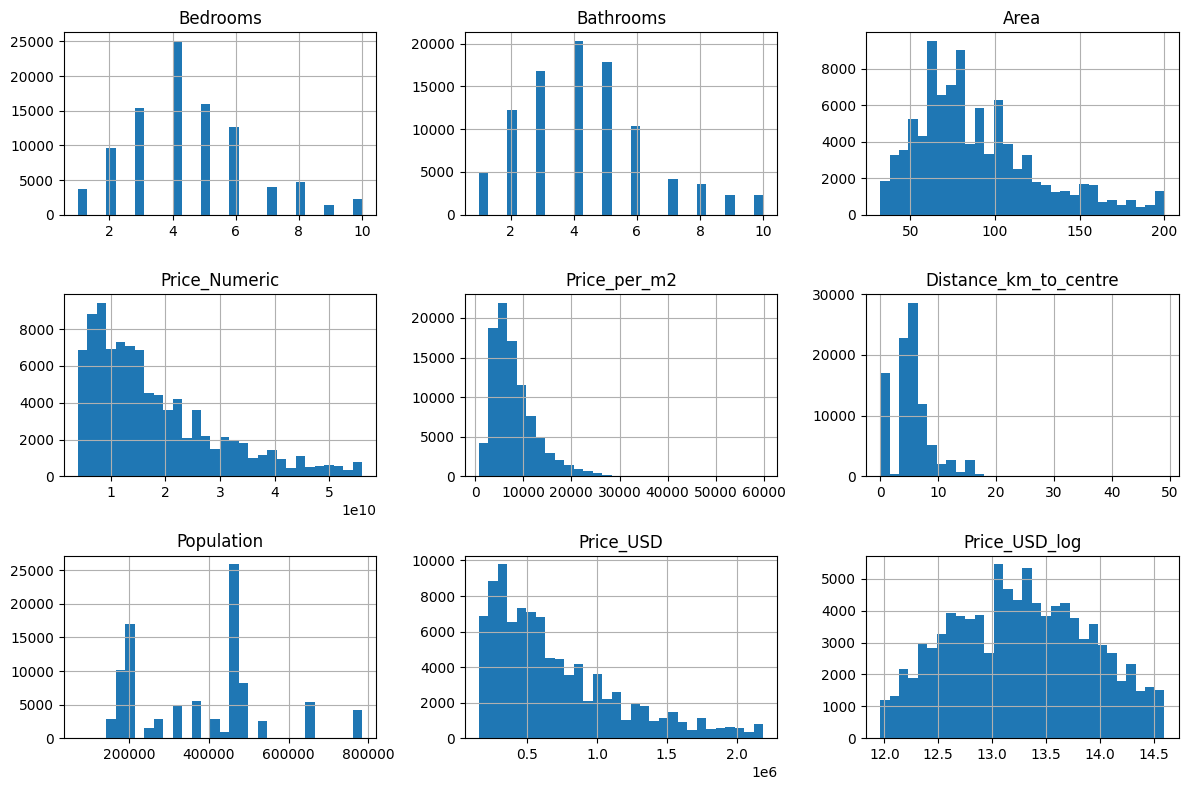

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
X = df[['Bedrooms', 'Bathrooms', 'Area', 'Population', 'Distance_km_to_centre']]
y = df['Price_USD_log']  

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,  # Increase number of trees
    learning_rate=0.05,  # Reduce learning rate
    max_depth=7,  # Increase depth for more complex patterns
    subsample=0.8,  # Reduce overfitting
    colsample_bytree=0.8,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# Get XGBoost predictions on training & test sets
xgb_train_preds = xgb_model.predict(X_train).reshape(-1, 1)
xgb_test_preds = xgb_model.predict(X_test).reshape(-1, 1)


In [ ]:
# Build a simple neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Input: XGBoost predictions
    Dense(32, activation='relu'),
    Dense(1)  # Output: Final house price prediction
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the neural network
nn_model.fit(xgb_train_preds, y_train, epochs=20, batch_size=32, validation_data=(xgb_test_preds, y_test))


Epoch 1/20
2371/2371 [==============================] - 2s 843us/step - loss: 1.1572 - mae: 0.3836 - val_loss: 0.1174 - val_mae: 0.2678
Epoch 2/20
2371/2371 [==============================] - 2s 845us/step - loss: 0.1084 - mae: 0.2572 - val_loss: 0.1219 - val_mae: 0.2725
Epoch 3/20
2371/2371 [==============================] - 2s 884us/step - loss: 0.1106 - mae: 0.2599 - val_loss: 0.1179 - val_mae: 0.2680
Epoch 4/20
2371/2371 [==============================] - 2s 856us/step - loss: 0.1108 - mae: 0.2600 - val_loss: 0.1193 - val_mae: 0.2690
Epoch 5/20
2371/2371 [==============================] - 2s 843us/step - loss: 0.1102 - mae: 0.2588 - val_loss: 0.1179 - val_mae: 0.2677
Epoch 6/20
2371/2371 [==============================] - 2s 846us/step - loss: 0.1106 - mae: 0.2593 - val_loss: 0.1394 - val_mae: 0.2917
Epoch 7/20
2371/2371 [==============================] - 2s 844us/step - loss: 0.1100 - mae: 0.2585 - val_loss: 0.1176 - val_mae: 0.2670
Epoch 8/20
2371/2371 [==========================

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get final predictions from NN
y_pred_log = nn_model.predict(xgb_test_preds)

# Convert back to original scale (if using log transform)
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


401/401 [==============================] - 0s 491us/step
Mean Absolute Error (MAE): 93083.73
Mean Squared Error (MSE): 14505030324.14
Root Mean Squared Error (RMSE): 120436.83
R² Score: 0.5119
